In [1]:
from dataloader import DAVIS_Seq2, normalize_image, BallDataset, Balltest
from model import GeneralExtra, CoordConv
from ModelInfer import ModelInfer
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import PIL.Image as Image
import numpy as np
from preprocess_utensils import get_gray_image, get_boundary_iou
import json
from loss import order_loss, chamer_distance_loss
import random

In [2]:
model_name = "resfpnConv"
feat_dim = 1280
model = GeneralExtra(
    nn.Sequential(
        nn.Conv2d(
            in_channels=feat_dim,
            out_channels=feat_dim,
            kernel_size=3,
            padding=1,
            stride=1,
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=feat_dim,
            out_channels=feat_dim,
            kernel_size=3,
            padding=1,
            stride=1,
        ),
        nn.ReLU(),
    ),
    encoder="resfpn",
).cuda()
loss_log_path = f"./log/{model_name}_loss.json"
iou_log_path = f"./log/{model_name}_iou.json"
model_path = f"./model/{model_name}.pth"
log_path = f"./log/{model_name}.log"

# another_model_name = "featupConv"
# another_loss_log_path = f"./log/{another_model_name}_loss.json"
# another_iou_log_path = f"./log/{another_model_name}_iou.json"

/work3/s232248/miniconda3/envs/vos/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/work3/s232248/miniconda3/envs/vos/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [3]:
with open(loss_log_path, "r") as f:
    dict_loss = json.load(f)
with open(iou_log_path, "r") as f:
    dict_iou = json.load(f)

# with open(another_loss_log_path, "r") as f:
#     another_dict_loss = json.load(f)
# with open(another_iou_log_path, "r") as f:
#     another_dict_iou = json.load(f)

In [4]:
numeric_dict_loss = {}
for key, value in dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
dict_loss = numeric_dict_loss
dict_iou = numeric_dict_iou

In [5]:
# numeric_dict_loss = {}
# for key, value in another_dict_loss.items():
#     numeric_dict_loss[int(key)] = float(value)
# numeric_dict_iou = {}
# for key, value in another_dict_iou.items():
#     numeric_dict_iou[int(key)] = float(value)
# another_dict_loss = numeric_dict_loss
# another_dict_iou = numeric_dict_iou

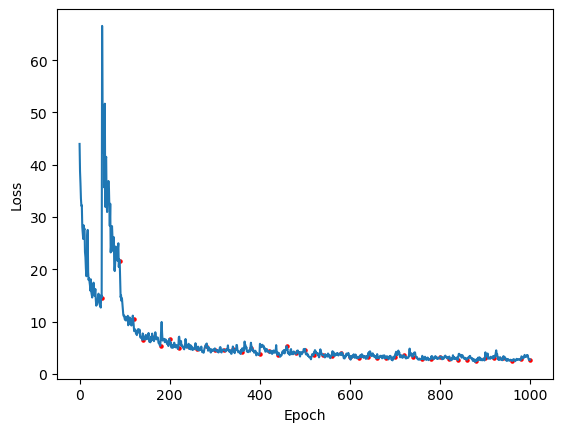

In [6]:
# plot the loss
plt.plot(
    list(dict_loss.keys()),
    list(dict_loss.values()),
    # label="with Coord",
)
# plt.plot(
#     list(another_dict_loss.keys()),
#     list(another_dict_loss.values()),
#     label="without Coord",
# )
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plot the update points
plt.scatter(
    list(dict_iou.keys()),
    [dict_loss[i - 1] for i in list(dict_iou.keys())],
    c="r",
    s=5,
)
# plt.legend()
plt.show()

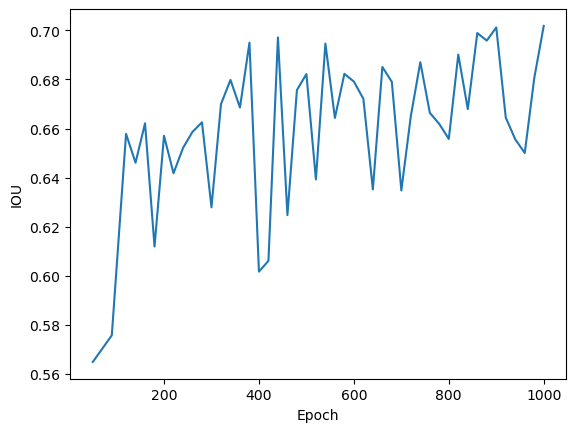

In [7]:
# plot the iou
plt.plot(
    list(dict_iou.keys()),
    list(dict_iou.values()),
    # label="with Coord",
)
# plt.plot(
#     list(another_dict_iou.keys()),
#     list(another_dict_iou.values()),
#     label="without Coord",
# )
plt.xlabel("Epoch")
plt.ylabel("IOU")
# plt.legend()
plt.show()

In [8]:
# load the model
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [9]:
testset = Balltest("ellipse/uniform_samples_80.json")
model_infer = ModelInfer(testset)

In [10]:
model_infer.infer_model(model)

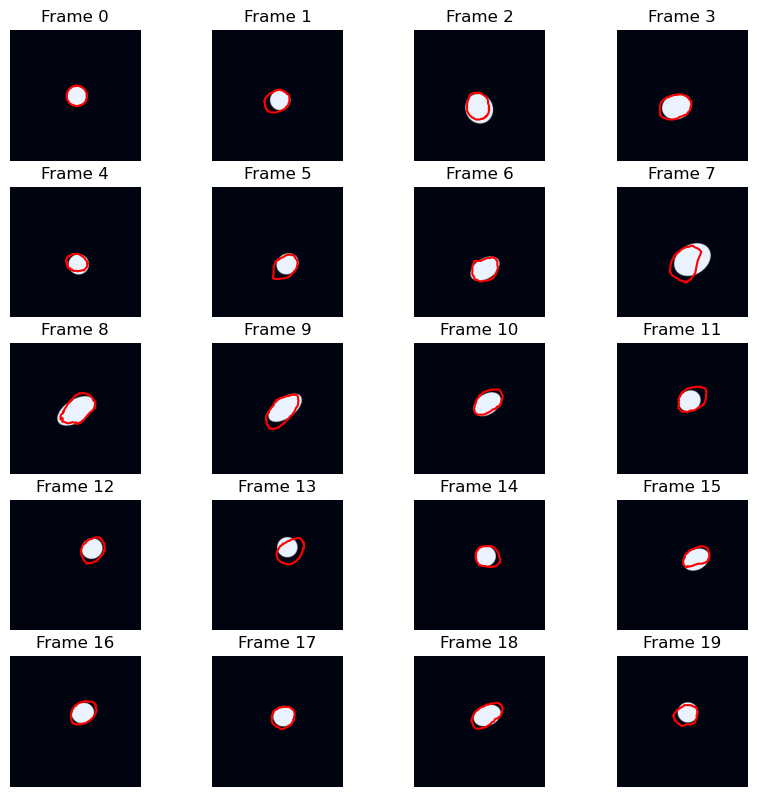

0.7018431937581857

In [11]:
model_infer.show_infer_result(0)